In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/src/')
import _config

sys.path.append('/home/unix/maxwshen/')
from mylib import util

notebook_nm = 'fig_pb_h_reduced_readlen'
results_dir = _config.RESULTS_PLACE + f'{notebook_nm}/'
util.ensure_dir_exists(results_dir)

import pb_h_evaluate_exps as parent_script

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/data/
Device: cpu


In [70]:
modelexp_nm = 'modelexp_simple_rs'

df = pd.read_csv(parent_script.out_dir + f'{modelexp_nm}.csv', index_col = 0)
df['R2 overall'] = df['Pearsonr (overall)']**2
df.loc[df['data_readlen'] == 1, 'data_readlen'] = 3

print(df.columns)
print(df.shape)

df.to_csv(results_dir + f'{modelexp_nm}.csv')

Index(['Int name', 'Random seed', 'Dataset', 'Pearsonr (overall)',
       'TimewiseR count', 'TimewiseR mean', 'TimewiseR std', 'TimewiseR min',
       'TimewiseR 25%', 'TimewiseR 50%', 'TimewiseR 75%', 'TimewiseR max',
       'data_readlen', 'data_num_proposed_gts', 'data_proposal_type',
       'data_num_groups', 'R2 overall'],
      dtype='object')
(561, 17)


## plot

Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/fig_pb_h_reduced_readlen/boxplot.pdf ...


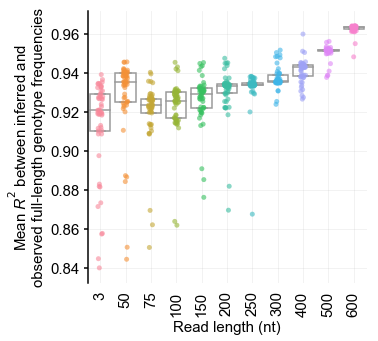

In [71]:
#
import matplotlib
matplotlib.rc('font', family = 'Arial', size = 15)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
#
fig, ax = plt.subplots(figsize = (5, 5))

# stat = 'Pearsonr (overall)'
# stat = 'TimewiseR mean'
stat = 'R2 overall'

sns.boxplot(
    x = 'data_readlen',
    y = stat,
    data = df,
    color = 'white',
    fliersize = 0,
#     width = 0.6,
    whis = 0,
    ax = ax,
)
sns.stripplot(
    x = 'data_readlen',
    y = stat,
    data = df,
    alpha = 0.6,
    # color = '#b6b9bc',
#     palette = sns.color_palette('husl'),
    ax = ax,
)
plt.grid(alpha = 0.2)

plt.xlabel('Read length (nt)');
plt.ylabel('Mean $R^2$ between inferred and\nobserved full-length genotype frequencies');
plt.xticks(rotation = 90);

##

sns.despine(trim = False, bottom = True)
ax.xaxis.set_ticks_position('none') 
ax.tick_params(length = 4.5, color = 'black', width = 1.5)
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1.5)
    ax.spines[axis].set_color('black')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

out_fn = results_dir + f'boxplot.pdf'
print(f'Saving to {out_fn} ...')
plt.savefig(out_fn, transparent = True, bbox_inches = 'tight')

plt.show()
plt.close()
##

## explore

In [67]:
df.head()

,Int name,Random seed,Dataset,Pearsonr (overall),TimewiseR count,TimewiseR mean,TimewiseR std,TimewiseR min,TimewiseR 25%,TimewiseR 50%,TimewiseR 75%,TimewiseR max,data_readlen,data_num_proposed_gts,data_proposal_type,data_num_groups,R2 overall
0,0,0,simple_smart_rl_1,0.965685,34.0,0.897408,0.254430,0.081380,0.975577,0.996774,0.999838,1.000000,1,66,smart,19,0.932548
1,1,0,simple_smart_rl_50,0.966753,34.0,0.893579,0.261632,0.082619,0.964745,0.997465,0.999861,0.999999,50,64,smart,14,0.934611
2,2,0,simple_smart_rl_75,0.963415,34.0,0.887523,0.247925,0.089128,0.944937,0.996458,0.999838,0.999998,75,64,smart,13,0.928169
3,3,0,simple_smart_rl_100,0.956315,34.0,0.874476,0.263763,0.089685,0.915212,0.990263,0.999839,1.000000,100,66,smart,12,0.914538
4,4,0,simple_smart_rl_150,0.962706,34.0,0.887994,0.249535,0.068906,0.932977,0.996709,0.999845,0.999998,150,62,smart,10,0.926802


In [72]:
df[df['data_readlen'] == 3]

,Int name,Random seed,Dataset,Pearsonr (overall),TimewiseR count,TimewiseR mean,TimewiseR std,TimewiseR min,TimewiseR 25%,TimewiseR 50%,TimewiseR 75%,TimewiseR max,data_readlen,data_num_proposed_gts,data_proposal_type,data_num_groups,R2 overall
0,0,0,simple_smart_rl_1,0.965685,34.0,0.897408,0.254430,0.081380,0.975577,0.996774,0.999838,1.000000,3,66,smart,19,0.932548
11,11,1,simple_smart_rl_1,0.934541,34.0,0.845413,0.297398,0.082506,0.960478,0.996504,0.999829,0.999999,3,66,smart,19,0.873366
22,22,2,simple_smart_rl_1,0.958753,34.0,0.888936,0.254396,0.081398,0.942343,0.988031,0.999663,0.999998,3,66,smart,19,0.919208
33,33,3,simple_smart_rl_1,0.959674,34.0,0.887691,0.261144,0.050474,0.958484,0.996699,0.999799,0.999998,3,66,smart,19,0.920974
44,44,4,simple_smart_rl_1,0.919063,34.0,0.823340,0.319936,0.082971,0.902306,0.988244,0.999662,0.999998,3,66,smart,19,0.844677
55,55,5,simple_smart_rl_1,0.963903,34.0,0.887345,0.278829,-0.020428,0.971479,0.996323,0.999807,1.000000,3,66,smart,19,0.929109
66,66,6,simple_smart_rl_1,0.962864,34.0,0.890883,0.270882,-0.011078,0.970964,0.996529,0.999805,0.999999,3,66,smart,19,0.927108
77,77,7,simple_smart_rl_1,0.916495,34.0,0.831309,0.329454,-0.022465,0.909202,0.986563,0.999713,0.999999,3,66,smart,19,0.839963
88,88,8,simple_smart_rl_1,0.966166,34.0,0.897563,0.252295,0.082240,0.971112,0.996711,0.999792,0.999998,3,66,smart,19,0.933477
99,99,9,simple_smart_rl_1,0.939036,34.0,0.846223,0.304190,0.050837,0.954700,0.996109,0.999784,0.999998,3,66,smart,19,0.881789
